<a href="https://colab.research.google.com/github/Manjuphoenix/ML_team_buzz/blob/michelle/mnist_MMMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cpu


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([4, 1, 28, 28]) torch.Size([4])
tensor([[[[-0.5733, -0.5733, -0.5733,  ..., -0.5733, -0.5733, -0.5733],
          [-0.5733, -0.5733, -0.5733,  ..., -0.5733, -0.5733, -0.5733],
          [-0.5733, -0.5733, -0.5733,  ..., -0.5733, -0.5733, -0.5733],
          ...,
          [-0.5733, -0.5733, -0.5733,  ..., -0.5733, -0.5733, -0.5733],
          [-0.5733, -0.5733, -0.5733,  ..., -0.5733, -0.5733, -0.5733],
          [-0.5733, -0.5733, -0.5733,  ..., -0.5733, -0.5733, -0.5733]],

         [[ 0.4921,  0.4921,  0.4921,  ...,  0.4921,  0.4921,  0.4921],
          [ 0.4921,  0.4921,  0.4921,  ...,  0.4921,  0.4921,  0.4921],
          [ 0.4921,  0.4921,  0.4921,  ...,  0.4921,  0.4921,  0.4921],
          ...,
          [ 0.4921,  0.4921,  0.4921,  ...,  0.4921,  0.4921,  0.4921],
          [ 0.4921,  0.4921,  0.4921,  ...,  0.4921,  0.4921,  0.4921],
          [ 0.4921,  0.4921,  0.4921,  ...,  0.4921,  0.49

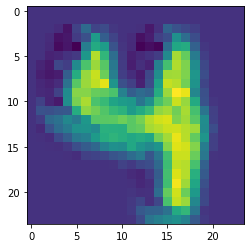

In [ ]:
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
import torch.nn as nn
import torchvision.transforms.functional as fn
import numpy
import torchvision
from torch.utils import data
from torchvision import transforms

# steps involved:
# 1. Download and define the training, testing data
# 2. Define the model by creating neural networks
# 3. Calculate the gradient, loss and update the model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


# transformation = torchvision.transforms.ToTensor()
transformation = torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])
# test_transform  = torchvision.transforms.Compose([
#     transforms.Resize((784)),
#     transforms.ToTensor(),
# ])
num_class = 10
input_size = 784
hidden_size = 100
batches = 4
learning_rate = 0.01
num_epochs = 5

mnist_train = torchvision.datasets.MNIST(root="./data", train=True, transform=transformation, download=True)
mnist_test = torchvision.datasets.MNIST(root="./data", train=False, transform=transformation, download=False)

train_data = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batches, shuffle=True)
test_data = torch.utils.data.DataLoader(dataset=mnist_test, batch_size=batches, shuffle=False)

examples = iter(train_data)
samples, label = examples.next()
print(samples.shape, label.shape)

test_examples = iter(test_data)
test_samples, test_lables = test_examples.__next__()


# for i in range(6):
#     plt.subplot(3,3, i+1)
#     plt.imshow(samples[i][0], cmap='gray')
# plt.show()


# plt.imshow(samples[99][0], cmap='gray')
# plt.show()


# 2. Create the neural network layers
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 8, 3),
            nn.Conv2d(8, 16, 3)
            # nn.ReLU(),
            # nn.AvgPool2d(2, stride=2),  # (N, 3, 24, 24) -> (N,  3, 12, 12)
            # nn.Conv2d(3, 6, 3),
            # nn.BatchNorm2d(6)           # (N, 3, 12, 12) -> (N,  6, 10, 10)
        )
        # self.features1 = nn.Sequential(
        #     nn.ReLU(),
        #     nn.AvgPool2d(2, stride=2)   # (N, 6, 10, 10) -> (N,  6, 5, 5)
        # )
        # self.classifier = nn.Sequential(
        #     nn.Linear(150, 25),         # (N, 150) -> (N, 25)
        #     nn.ReLU(),
        #     nn.Linear(25,10)            # (N, 25) -> (N, 10)
        # )

    def forward(self, x):
        x = self.features(x)
        # x = self.features1(x)
        # x = x.view(x.size(0), -1)
        # x = self.classifier(x)
        return x
    # def __init__(self, input_size, num_class):
    #     super(NeuralNetwork, self).__init__()
    #     self.conv1 = nn.Sequential(
    #         nn.Conv2d(
    #             in_channels=input_size, out_channels=32, kernel_size=(2,2), padding=2
    #         ),
    #         # nn.ReLU(),
    #         # nn.MaxPool2d(kernel_size=2),
    #     )
    #     self.maxp = nn.MaxPool2d(kernel_size=(2,2))
    #     self.conv2 = nn.Sequential(
    #         nn.Conv2d(
    #             in_channels=32,
    #             out_channels=64,
    #             kernel_size=(3,3),
    #             padding=0,
    #             stride=1
    #         ),
    #         # nn.ReLU(),
    #         # nn.MaxPool2d(2),
    #     )
    #     self.maxp2 = nn.MaxPool2d(kernel_size=(2,2))
    #     self.fc1 = nn.Sequential(
    #         nn.Linear(in_features=64*5*5, out_features=200)
    #     )
    #     self.fc2 = nn.Sequential(
    #         nn.Linear(in_features=200, out_features=num_class),
    #         nn.ReLU()
    #     )
    #     # fully connected layer, output 10 classes
    #     # self.out = nn.Linear(32 * 7 * 7, 10)
    #
    # def forward(self, x):
    #     x = self.conv1(x)
    #     x = self.maxp1(x)
    #     x = self.conv2(x)
    #     x = self.maxp2(x)
    #     x = x.contiguous().view(x.size(0), -1)
    #     x = self.fc1(x)
    #     x = self.fc2(x)
    #     return x


    # def forward(self, x):
    #     x = self.conv1(x)
    #     x = self.conv2(x)
    #     # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    #     x = x.view(x.size(0), -1)
    #     output = self.out(x)
    #     return output

model = NeuralNetwork()

output = model(samples)
print(output)

plt.imshow(output[0, 0, :, :].detach().numpy())
plt.show()

# 3. Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#
# # 4. Training loop
# n_steps = len(train_data)
# for epoch in range(num_epochs):
#     for i, datas in enumerate(samples):
# # reshape the images
# #         inputs, label = datas
# #         inputs, label = datas[0].to(device), datas[1].to(device)
# #         samples = np.expand_dims(datas, 1)    # if numpy array
# #         images = torch.unsqueeze(datas, 1).to(device)
#         # images = images.reshape(-1, 28*28).to(device)
#         label = label.to(device)
# # forward pass
#         outputs = model(samples)
#         loss = criterion(outputs, label)
#
# # backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#
#         if(i+1)%100 ==0 :
#             print(f"epoch {epoch+1} loss = {loss.item()}")
#
# # test and evaluate
#
# with torch.no_grad():
#     n_correct = 0
#     n_samples = 0
#     for images, labels in test_data:
#         images = images.reshape(-1, 28*28).to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#
# # value, index
#         _, predictions = torch.max(outputs, 1)
#         n_samples += label.shape[0]
#         n_correct = (predictions == labels).sum().item()
#
#     acc = 100.0* n_correct / n_samples
#     print(f"accuracy = {acc}")
#
# cap = cv2.VideoCapture(0)
# while True:
#     status, photo = cap.read()
#     cv2.imshow('Attention please', photo)
#     if cv2.waitKey(1) == 13:
#         img = cv2.imwrite("new.png", photo)
#         break
# cv2.destroyAllWindows()
#
# test_image = test_samples[74][0]
# test_image = test_image.reshape(-1, 784).to(device)
# # images = torch.from_numpy(test_image)
# # width, height = test_image.size
# # crop = test_image.resize((784, int(784*(height/width))) if width < height else (int(784*(width/height)), 784))
# # crop = fn.center_crop(images, output_size=[28])
# # images = torchvision.transforms.CenterCrop(size=784)
# # images = images.reshape(-1, 28 * 28).to(device)
# # print(type(crop))
# # print(crop.shape)
# print(model(test_image))
# plt.imshow(test_samples[74][0], cmap='gray')
# plt.show()